Before working on makong the giant transformer module I need to learn how to share variables across the codebase

In [5]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()

In [2]:
def encoder(x, mode = True, reuse = False):
    print(mode)
    # x: the input placeholder for this cell
    with tf.variable_scope('encoder', reuse = reuse):
        # getting weights
        weight_key = tf.get_variable('weight_key', (1, 14), tf.float32)
        weight_query = tf.get_variable('weight_query', (1, 14), tf.float32)
        weight_value = tf.get_variable('weight_value', (1, 14), tf.float32)
        if reuse:
            w1 = weight_value
        else:
            w2 = weight_value
        # values
        key_soft = tf.matmul(x, weight_key)
        query_soft = tf.matmul(x, weight_query)
        value_soft = tf.matmul(x, weight_value)
        # return
        if mode:
            return key_soft + query_soft + value_soft, weight_value
        else:
            return key_soft - query_soft + value_soft, weight_value

In [3]:
x = tf.placeholder(tf.float32, [1,1], name = 'input_placeholder')
encoder_1, w1 = encoder(x)
encoder_2, w2 = encoder(x, mode = False, reuse = True)

True
False


In [4]:
print(w1, w2)

<tf.Variable 'encoder/weight_value:0' shape=(1, 14) dtype=float32_ref> <tf.Variable 'encoder/weight_value:0' shape=(1, 14) dtype=float32_ref>


In [3]:
# constants
H_VALUE = 8 # number of heads in multihead attention mechanism
D_MODEL = 512 # input size
D_KEY = 64 # D_MODEL//H_VALUE 
D_VALUE = 64 # D_MODEL//H_VALUE

def multihead_attention(value, key, query, reuse = True):
    reuse_linear = True
    with tf.variable_scope('multihead_attention', reuse = reuse):
        head_tensors = [] # list to store all the output of heads
        for i in range(H_VALUE):
            if not reuse and i == 0:
                # this is the first time it has been called
                # common sense tells that if we are not reusing the outer loop then it is first time
                # and in for loop if the index is 0 then also it's the first time it's been called
                reuse_linear = False
            with tf.variable_scope('linear' + str(i), reuse = reuse_linear):
                # weight value
                weight_query = tf.get_variable('weight_query' + str(i), (D_MODEL, D_KEY))
                weight_key = tf.get_variable('weight_key' + str(i), (D_MODEL, D_KEY))
                weight_value = tf.get_variable('weight_value' + str(i), (D_MODEL, D_VALUE))
                # projected values
                key_proj = tf.matmul(key, weight_key)
                query_proj = tf.matmul(query, weight_query)
                value_proj = tf.matmul(value, weight_value)

                # Scale Dot Product Attention
                qkt = tf.matmul(query_proj, value_proj, transpose_b = True)
                qkt /= np.sqrt(D_KEY)
                soft_qkt = tf.nn.softmax(qkt)
                head = tf.matmul(soft_qkt, value_proj)

                # add the new
                head_tensors.append(head)

        # now we proceed to the concatenation
        return head_tensors

In [4]:
value_placeholder = tf.placeholder(tf.float32, [1, D_MODEL], name = 'value_placeholder')
query_placeholder = tf.placeholder(tf.float32, [1, D_MODEL], name = 'query_placeholder')
key_placeholder = tf.placeholder(tf.float32, [1, D_MODEL], name = 'key_placeholder')

In [5]:
ht = multihead_attention(value_placeholder, key_placeholder, query_placeholder, reuse = False)

In [6]:
ht

[<tf.Tensor 'multihead_attention/linear0/MatMul_4:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'multihead_attention/linear1/MatMul_4:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'multihead_attention/linear2/MatMul_4:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'multihead_attention/linear3/MatMul_4:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'multihead_attention/linear4/MatMul_4:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'multihead_attention/linear5/MatMul_4:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'multihead_attention/linear6/MatMul_4:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'multihead_attention/linear7/MatMul_4:0' shape=(1, 64) dtype=float32>]

In [48]:
head_concat = tf.reshape(tf.stack(ht), [1, -1])
print(head_concat)
print(head_concat.shape)

Tensor("Reshape_3:0", shape=(1, 512), dtype=float32)
(1, 512)


In [22]:
squeeze = tf.squeeze(stack)
print(squeeze)

Tensor("Squeeze_1:0", shape=(8, 64), dtype=float32)


In [23]:
reshaped = tf.reshape(squeeze, [1, 8*64])
print(reshaped)

Tensor("Reshape_1:0", shape=(1, 512), dtype=float32)


In [20]:
reshaped

<tf.Tensor 'Reshape:0' shape=(1, 512) dtype=float32>

In [46]:
x = [[1, 2, 3]]
y = np.hstack([x, x, x])
print(y.shape)
z = np.stack([x, x, x], axis = 0)
print(z.shape)
z = np.reshape(z, [1, -1])
print(z.shape)
print(z)

(1, 9)
(3, 1, 3)
(1, 9)
[[1 2 3 1 2 3 1 2 3]]


In [1]:
from transformer import TransformerNetwork

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tt = TransformerNetwork()

TypeError: make_transformer() missing 4 required positional arguments: 'input_placeholder', 'output_placeholder', 'labels_placeholder', and 'position'

In [ ]:
vars_network = tt.return_network()

In [5]:
vars_network

NameError: name 'vars_network' is not defined

In [8]:
# some constants for the toy dataset
MAXLEN_SENT_L1 = 128 # maximum length of a sentence for langauge 1
MAXLEN_SENT_L2 = 152 # maximum length of a sentence for langauge 2
VOCAB_SIZE_L1 = 2048 # vocabulary for language 1
VOCAB_SIZE_L2 = 3012 # vocabulary for language 2
num_examples = 10000 # number of samples
test_split = 0.1 # test/total_data

In [9]:
# making random lenght sentences
data_l1 = np.asarray([np.random.randint(VOCAB_SIZE_L1, size = np.random.randint(MAXLEN_SENT_L1)) for _ in range(num_examples)])
data_l2 = np.asarray([np.random.randint(VOCAB_SIZE_L2, size = np.random.randint(MAXLEN_SENT_L2)) for _ in range(num_examples)])

In [10]:
data_l1[1]

array([ 659,    4, 1586,  443, 1900,  202,  464, 1439,  436, 1940,  380,
       1718,  849,  987,  166, 1939,  329,  623,  895, 1049, 1709, 1232,
       1117,  437, 1946, 1593,  405, 2002,  685, 1135,  317, 1077,  188,
        149,   88, 1212,  552,  512, 1623,  510,  174,  603,  185, 1689,
        238,  164, 1135,  696,   26, 1924,   77, 1074, 1932,  197,  476,
        157])

In [11]:
data_l2[1]

array([2685, 2040, 1855,  931,  969, 2141, 1226, 2005,   39, 2214,  752,
       2952, 2573, 2748, 1549, 1762, 1538, 1820,  220, 2173, 2437, 1374,
       1593, 1701, 1173, 1968, 1781, 2214, 1009, 2048, 2202, 2116, 2071,
       1997, 2278, 2652, 1921, 2772, 2039,  366,  793, 1449,  551, 2477,
       1826, 1600, 1310, 2769, 1310,  118, 1184, 2397, 2284,  390, 1417,
       1537,  608,  262,   38,  972, 2386, 2420, 1535, 2477,  348, 1364,
       1693, 3002, 1076, 3003,  616, 2797, 2280, 1820, 1745, 1818,  927,
       1586,  949, 1135, 1522, 1837, 2512, 2348, 1405, 1471, 2606, 1851,
       1205, 2636, 1594, 1350, 2901, 1266,  583, 1518, 1100, 1479,  303,
       2807, 1266, 1790, 1434, 2095, 1848,  817, 2822,  106,  315, 1015,
        497, 2594, 2033, 1951,   92,  231, 2508, 2856,  594, 1531, 1192,
        898, 1714, 2864,  995,  739,  115, 2861, 1484, 2949, 1861, 1928,
       2187, 2828, 1375, 1204,  669, 1845, 1210,    7, 2096,  272, 2250,
        343, 2551,  198,  987])

In [19]:
data_l1_final = []
data_l2_final = []
for i in range(num_examples):
    # 9999 is the break value, once we get that as the prediction, break the while loop
    data_l1_final.append(np.append(data_l1[i], 9999))
    data_l2_final.append(np.append(data_l2[i], 9999))
data_l1_final = np.array(data_l1_final)
data_l2_final = np.array(data_l2_final)

In [22]:
print(data_l1_final[1])
print(data_l2_final[1])

[ 659    4 1586  443 1900  202  464 1439  436 1940  380 1718  849  987
  166 1939  329  623  895 1049 1709 1232 1117  437 1946 1593  405 2002
  685 1135  317 1077  188  149   88 1212  552  512 1623  510  174  603
  185 1689  238  164 1135  696   26 1924   77 1074 1932  197  476  157
 9999]
[2685 2040 1855  931  969 2141 1226 2005   39 2214  752 2952 2573 2748
 1549 1762 1538 1820  220 2173 2437 1374 1593 1701 1173 1968 1781 2214
 1009 2048 2202 2116 2071 1997 2278 2652 1921 2772 2039  366  793 1449
  551 2477 1826 1600 1310 2769 1310  118 1184 2397 2284  390 1417 1537
  608  262   38  972 2386 2420 1535 2477  348 1364 1693 3002 1076 3003
  616 2797 2280 1820 1745 1818  927 1586  949 1135 1522 1837 2512 2348
 1405 1471 2606 1851 1205 2636 1594 1350 2901 1266  583 1518 1100 1479
  303 2807 1266 1790 1434 2095 1848  817 2822  106  315 1015  497 2594
 2033 1951   92  231 2508 2856  594 1531 1192  898 1714 2864  995  739
  115 2861 1484 2949 1861 1928 2187 2828 1375 1204  669 1845 1210    7

In [23]:
def positional_encoding(pos):
		# @TODO: optimise this piece of code
		pos_embed = []
		for i in range(512):
			angle = pos/(10**(8*i/512))
			if i%2 == 0:
				pos_embed.append(np.sin(angle))
				continue
			pos_embed.append(np.cos(angle))
		return np.array(pos_embed, dtype = np.float32)

In [29]:
x = positional_encoding(12)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

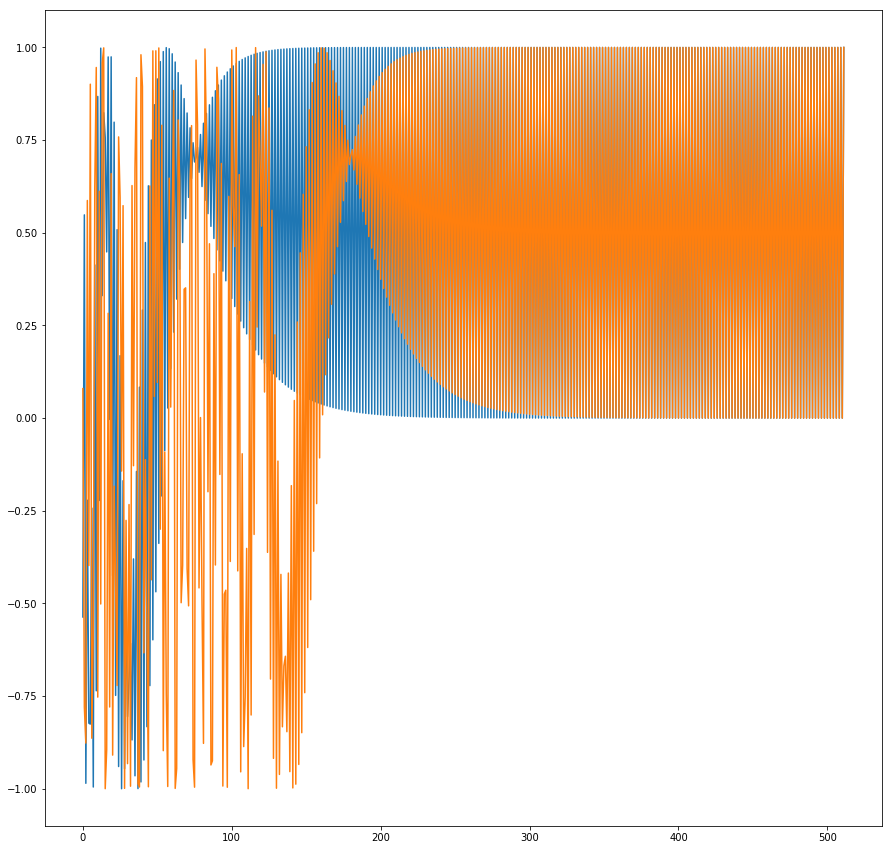

In [31]:
plt.figure(figsize = (20, 10))
plt.plot(positional_encoding(12))
plt.plot(positional_encoding(512))

In [32]:
pos = tf.placeholder(tf.int32, [None])

In [33]:
sess = tf.Session()

In [36]:
x = sess.run(pos, feed_dict = {pos: [1, 2, 3, 4]})
print(x)

[1 2 3 4]


In [1]:
from transformer import Transformer
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tt = Transformer(VOCAB_SIZE = 213, DIM_MODEL = 12, NUM_HEADS = 4, FF_MID = 36)
tt.initialize_network()

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


stacks_out: Tensor("transformer_network/decoder/stack_2/l2_normalize_2:0", shape=(?, 12), dtype=float32)


<class 'numpy.float32'>


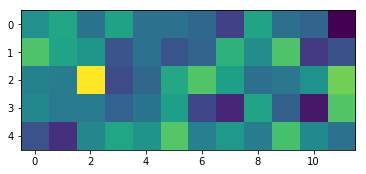

In [7]:
input_seq = np.random.randn(5, 12).astype(np.float32)
output_seq = np.random.randn(5, 12).astype(np.float32)
label = [0,] * 213
label[12] = 1
print(type(input_seq[0][0]))
plt.imshow(input_seq)
plt.imshow(output_seq)

In [8]:
print(label)
lr = np.reshape(label, [1, -1])
print(lr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [9]:
gen = tt.run(input_seq = input_seq, output_seq = output_seq, onehot_label = lr, is_training = False)
print(gen)

[0, 0, 0, 0, 0]


In [11]:
gen, loss = tt.run(input_seq = input_seq, output_seq = output_seq, onehot_label = lr, is_training = True)
print(gen, loss)

[0, 0, 0, 0, 0] [nan, nan, nan, nan, nan]


In [12]:
tt.decoder_op

<tf.Tensor 'transformer_network/decoder/dense/Softmax:0' shape=(?, 213) dtype=float32>

In [13]:
tt.encoder_stack_op

[<tf.Tensor 'transformer_network/encoder/stack/add_1:0' shape=(?, 12) dtype=float32>,
 <tf.Tensor 'transformer_network/encoder/stack_1/add_1:0' shape=(?, 12) dtype=float32>,
 <tf.Tensor 'transformer_network/encoder/stack_2/add_1:0' shape=(?, 12) dtype=float32>]

In [21]:
# inputs
input_seq = np.random.randn(5, 12).astype(np.float32)
output_seq = np.random.randn(5, 12).astype(np.float32)
label = [0,] * 213
label[12] = 1
label = np.reshape(label, [1, -1])
masking_matrix = np.array([([1,] * (i+1)) + ([1e-36,] * (5 - i - 1)) for i in range(5)], dtype = np.float32)

# feed dict
feed = {tt.masking_matrix: masking_matrix,
        tt.input_placeholder: input_seq,
        tt.output_placeholder: output_seq,
        tt.generated_length: [1],
        tt.labels_placeholder: label}

# run the network
decoder_op, loss = tt.sess.run([tt.decoder_op, tt.loss], feed_dict = feed)

In [22]:
decoder_op

array([[0.00478864, 0.0044019 , 0.00451389, ..., 0.00442898, 0.00448608,
        0.00444611],
       [0.0048596 , 0.00497144, 0.00444192, ..., 0.00459915, 0.00479127,
        0.0045677 ],
       [0.00470817, 0.00482643, 0.00444436, ..., 0.00449335, 0.00478965,
        0.00487542],
       [0.00467487, 0.00473544, 0.00462189, ..., 0.00460444, 0.00466483,
        0.00482403],
       [0.0044144 , 0.00454162, 0.00463592, ..., 0.00445956, 0.00451666,
        0.00487701]], dtype=float32)

In [16]:
loss

5.3612885

In [2]:
x = tt.get_variables()
for i in x:
    print(i)

<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear0/weight_q_l0:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear0/weight_k_l0:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear0/weight_v_l0:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear1/weight_q_l1:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear1/weight_k_l1:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear1/weight_v_l1:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear2/weight_q_l2:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear2/weight_k_l2:0' shape=(12, 3) dtype=float32_ref>
<tf.Vari

In [3]:
print(len(x))

45


In [5]:
var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'transformer_network')
for i in var:
    print(i)

<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear0/weight_q_l0:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear0/weight_k_l0:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear0/weight_v_l0:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear1/weight_q_l1:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear1/weight_k_l1:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear1/weight_v_l1:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear2/weight_q_l2:0' shape=(12, 3) dtype=float32_ref>
<tf.Variable 'transformer_network/encoder/stack/multihead_attention/linear2/weight_k_l2:0' shape=(12, 3) dtype=float32_ref>
<tf.Vari

In [6]:
print(len(var))

95


In [6]:
ip = tf.placeholder(tf.float32, [None, 64])
print(ip)

Tensor("Placeholder_8:0", shape=(?, 64), dtype=float32)


In [7]:
ip_tensor_list = [ip for _ in range(8)]
print(ip_tensor_list)

[<tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>, <tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>, <tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>, <tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>, <tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>, <tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>, <tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>, <tf.Tensor 'Placeholder_8:0' shape=(?, 64) dtype=float32>]


In [24]:
print(ip_tensor_list[0])
stack = tf.stack(ip_tensor_list)
print(stack)
ip_r = tf.reshape(stack, [-1])
print(ip_r)

Tensor("Placeholder_8:0", shape=(?, 64), dtype=float32)
Tensor("stack_9:0", shape=(8, ?, 64), dtype=float32)
Tensor("Reshape_9:0", shape=(?,), dtype=float32)


In [13]:
import numpy as np

In [20]:
x = [np.random.random(size = [1, 64]) for _ in range(8)]
print(len(x), x[0].shape)
y = np.reshape(x, [1, -1])
print(y.shape)

8 (1, 64)
(1, 512)


In [1]:
import numpy as np

In [3]:
x = -np.ones(12 - 8) * np.inf
print(x)
y = 12
print(x * y)

[-inf -inf -inf -inf]
[-inf -inf -inf -inf]


In [10]:
total_sent_len = 10
len_gen = tf.placeholder(tf.float32, [total_sent_len,])
print('len_gen:', len_gen)
for i in range(total_sent_len):
    mask_val = np.array(([1,] * (i+1)) + ([-np.inf,] * (total_sent_len - i - 1)))
    print('i:', i, 'mask_val:', mask_val)

len_gen: Tensor("Placeholder_1:0", shape=(10,), dtype=float32)
i: 0 mask_val: [  1. -inf -inf -inf -inf -inf -inf -inf -inf -inf]
i: 1 mask_val: [  1.   1. -inf -inf -inf -inf -inf -inf -inf -inf]
i: 2 mask_val: [  1.   1.   1. -inf -inf -inf -inf -inf -inf -inf]
i: 3 mask_val: [  1.   1.   1.   1. -inf -inf -inf -inf -inf -inf]
i: 4 mask_val: [  1.   1.   1.   1.   1. -inf -inf -inf -inf -inf]
i: 5 mask_val: [  1.   1.   1.   1.   1.   1. -inf -inf -inf -inf]
i: 6 mask_val: [  1.   1.   1.   1.   1.   1.   1. -inf -inf -inf]
i: 7 mask_val: [  1.   1.   1.   1.   1.   1.   1.   1. -inf -inf]
i: 8 mask_val: [  1.   1.   1.   1.   1.   1.   1.   1.   1. -inf]
i: 9 mask_val: [1 1 1 1 1 1 1 1 1 1]


In [12]:
mm = np.array([([1,] * (i+1)) + ([-np.inf,] * (total_sent_len - i - 1)) for i in range(total_sent_len)])
print(mm)

[[  1. -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [  1.   1. -inf -inf -inf -inf -inf -inf -inf -inf]
 [  1.   1.   1. -inf -inf -inf -inf -inf -inf -inf]
 [  1.   1.   1.   1. -inf -inf -inf -inf -inf -inf]
 [  1.   1.   1.   1.   1. -inf -inf -inf -inf -inf]
 [  1.   1.   1.   1.   1.   1. -inf -inf -inf -inf]
 [  1.   1.   1.   1.   1.   1.   1. -inf -inf -inf]
 [  1.   1.   1.   1.   1.   1.   1.   1. -inf -inf]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1. -inf]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]]


In [19]:
x = np.reshape(mm[0], [-1,1])
y = tf.matmul(x.T, x)
sess = tf.Session()
print(sess.run(y))
sess.close()

[[inf]]


In [28]:
sess = tf.Session()
ids = tf.placeholder(tf.int32, [1])
curr_row = tf.nn.embedding_lookup(mm, ids)
for i in range(mm.shape[0]):
    print(sess.run(curr_row, feed_dict = {ids: [i]}))
sess.close()

[[  1. -inf -inf -inf -inf -inf -inf -inf -inf -inf]]
[[  1.   1. -inf -inf -inf -inf -inf -inf -inf -inf]]
[[  1.   1.   1. -inf -inf -inf -inf -inf -inf -inf]]
[[  1.   1.   1.   1. -inf -inf -inf -inf -inf -inf]]
[[  1.   1.   1.   1.   1. -inf -inf -inf -inf -inf]]
[[  1.   1.   1.   1.   1.   1. -inf -inf -inf -inf]]
[[  1.   1.   1.   1.   1.   1.   1. -inf -inf -inf]]
[[  1.   1.   1.   1.   1.   1.   1.   1. -inf -inf]]
[[  1.   1.   1.   1.   1.   1.   1.   1.   1. -inf]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [33]:
temp_placeholder = tf.placeholder(tf.float32, [1, ids])
print(temp_placeholder)

TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'Tensor'.

## Running on toy data

Running the model on toy dataset

In [ ]:
import tensorflow as tf # ML
import numpy as np # linear algebra
from transformer import Transformer # model